In [34]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install mplfinance

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from xgboost import XGBRegressor

In [2]:
# 일봉 조회
df = pd.read_csv('BTC-USD.csv')

# 'Date' 열을 datetime 형태로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 'Date' 열을 인덱스로 설정
df.set_index('Date', inplace=True)

print(df)

                    Open          High           Low         Close  \
Date                                                                 
2014-09-17    465.864014    468.174011    452.421997    457.334015   
2014-09-18    456.859985    456.859985    413.104004    424.440002   
2014-09-19    424.102997    427.834991    384.532013    394.795990   
2014-09-20    394.673004    423.295990    389.882996    408.903992   
2014-09-21    408.084991    412.425995    393.181000    398.821014   
...                  ...           ...           ...           ...   
2023-07-15  30331.783203  30407.781250  30263.462891  30295.806641   
2023-07-16  30297.472656  30437.560547  30089.669922  30249.132813   
2023-07-17  30249.626953  30336.400391  29685.783203  30145.888672   
2023-07-18  30147.070313  30233.656250  29556.427734  29856.562500   
2023-07-20  29919.064453  30224.115234  29918.281250  30189.902344   

               Adj Close       Volume  
Date                                   
2014-09-1

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


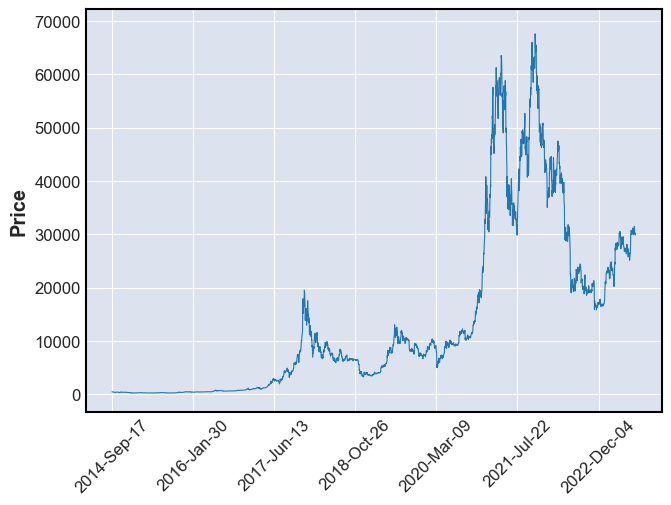

In [4]:
mpf.plot(df, type='line')

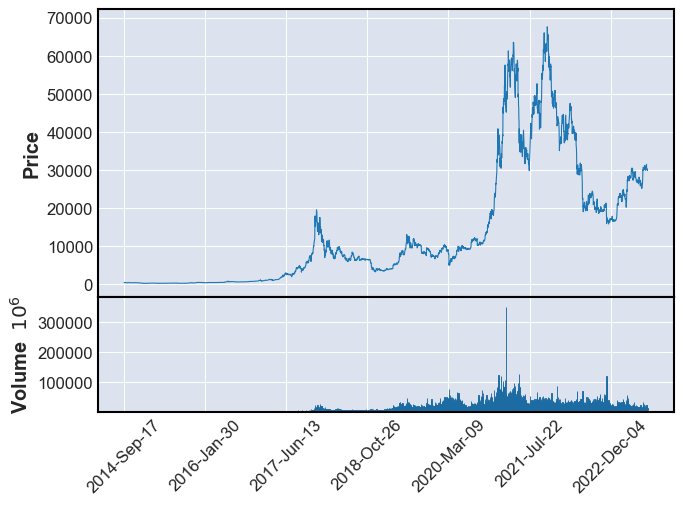

In [5]:
mpf.plot(df, volume = True, type='line')

- 2021년에 거래량 및 가격이 압도적으로 높음

In [6]:
Op=np.array(df["Open"])
Hi=np.array(df["High"])
Lo=np.array(df["Low"])
AC=np.array(df["Adj Close"])
V=np.array(df["Volume"])

- 정확한 예측을 위해 종가가 아닌 수정 종가를 반영

In [7]:
input=np.column_stack((Op,Hi,Lo,V))
output=AC

In [8]:
# input 중 op,hi,lo는 가격을 의미하고 v는 거래량을 의미해 다른 사이즈를 맞추는 작업
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
input_scaled=SS.fit_transform(input)

In [9]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(input_scaled,output)

In [10]:
from xgboost import XGBRegressor, plot_importance

XGBR=XGBRegressor(max_depth=3, reg_alpha=0.1)
XGBR.fit(train_input,train_output)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

[Text(0, 0, 'Open'),
 Text(0, 1, 'High'),
 Text(0, 2, 'Low'),
 Text(0, 3, 'Volume')]

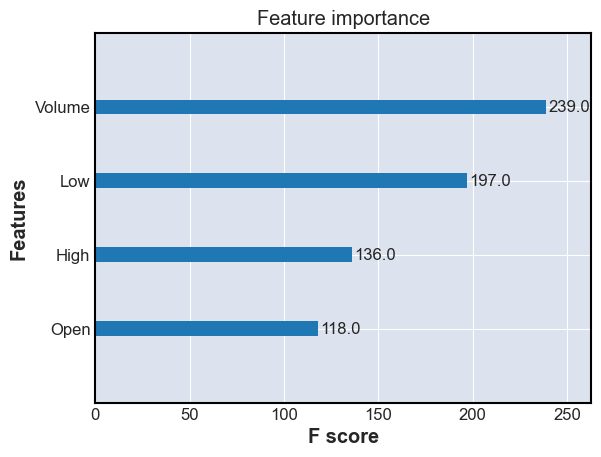

In [11]:
plot_importance(XGBR).set_yticklabels(['Open','High','Low','Volume'])

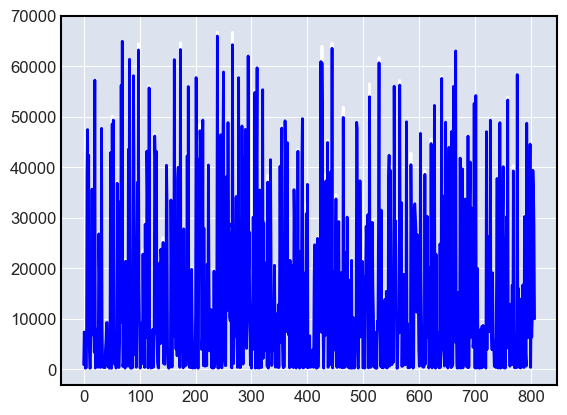

In [12]:
plt.plot(XGBR.predict(test_input),'w')
plt.plot(test_output,'b')

- 파란색 그래프가 예측값
- 흰색이 실제값

In [13]:
XGBR.score(test_input,test_output)
# 모델평가 99.9점

0.9990591705267481